In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xlrd
import datetime

In [41]:
df = pd.read_parquet('little_dental_clean.pq')

In [42]:
df.head(1)

,ACTIVITYID,RPID,PATID,USERID,SESSIONID,REMOTEIP,PAGENAME,timestamp,date
0,124130650925,41019304,41052965,RAYLENERAYFORD2021,bvh455ixumcrgc553pr0ul45,23.30.205.249,SearchPatients,2021-11-17 04:32:36.943,2021-11-17


## Date Range and Daily Usage

Let's see what the date range of the data is and how many commands there are per day.  We expect to see a weekly cycle to this.

In [43]:
df.date.min()  # start date

datetime.date(2021, 10, 27)

In [44]:
df.date.max()  # end date

datetime.date(2021, 12, 31)

In [123]:
len(df)

3311111

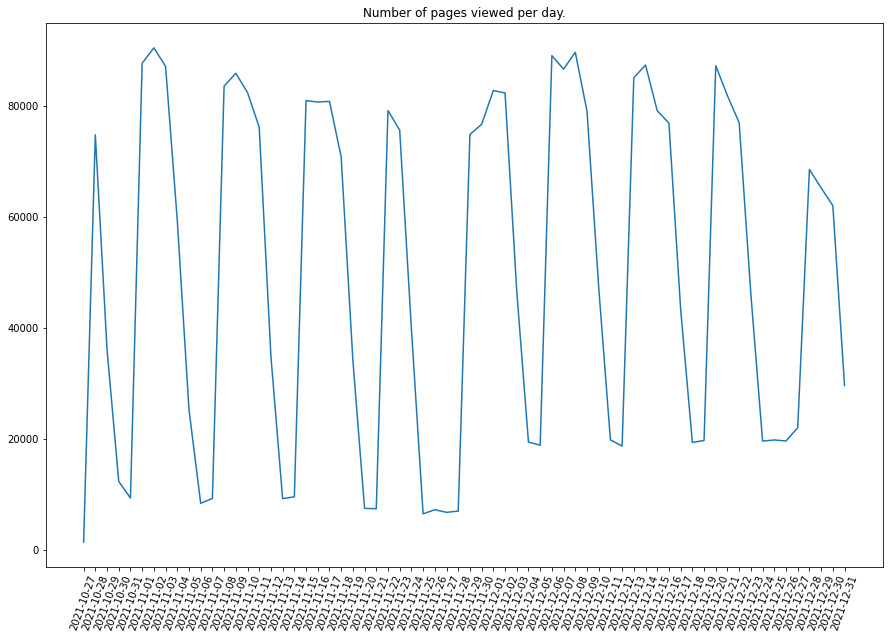

In [93]:
data = df.date.value_counts()
data = data.sort_index()
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.plot(np.arange(len(data)), data)
plt.gca().set_xticks(np.arange(len(data)))
plt.xticks(rotation=70)
plt.gca().set_xticklabels(data.index)
plt.title('Number of pages viewed per day.');

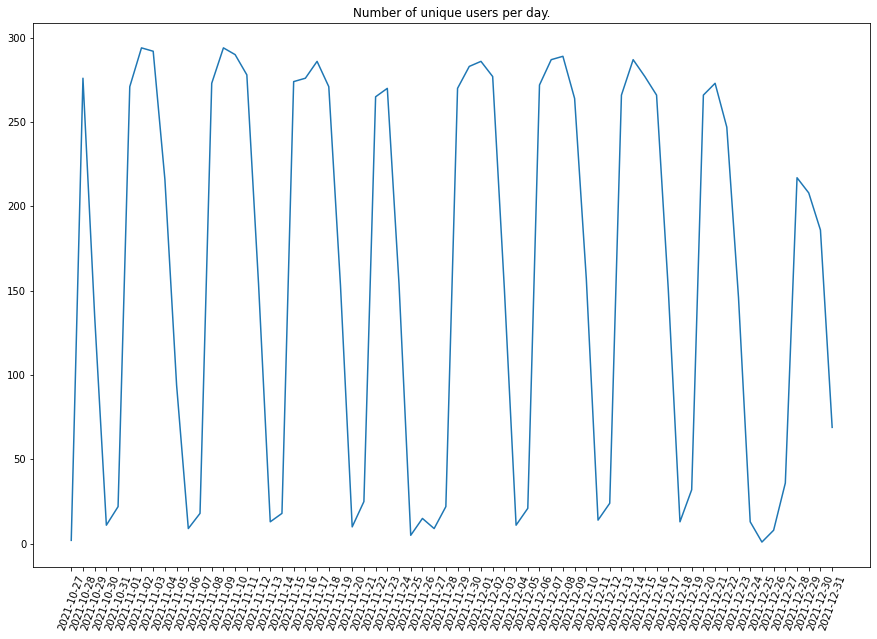

In [94]:
data = df.groupby(['date']).USERID.nunique()
data = data.sort_index()
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.plot(np.arange(len(data)), data)
plt.gca().set_xticks(np.arange(len(data)))
plt.xticks(rotation=70)
plt.gca().set_xticklabels(data.index)
plt.title('Number of unique users per day.');

This has the expected weekly cycle of use.  It is interesting to see that there is still some significant use on the weekends and that that use page vieww increased significantly starting in December. It is interesting to note that the number of users did not change at the same time so the same number of users are viewing more pages on the weekends.

In [56]:
# commands per day
one_week.date.value_counts().sort_index()

2021-12-06    89086
2021-12-07    86657
2021-12-08    89689
2021-12-09    79092
2021-12-10    47353
2021-12-11    19856
2021-12-12    18731
Name: date, dtype: int64

Let's look at the top 40 users in terms of page counts.

In [124]:
one_week.groupby(['USERID']).PAGENAME.count().sort_values(ascending=False)[:40]

USERID
DCOOPER22021           131730
ASHLEY.PECTOLBV2021     12333
JESSICADELACRUZ2021      7426
KELSEY.G2021             6801
ANAGOMEZ2021             5030
LATIAGRAY2021            4293
SUMMERMC2021             4106
ERICAHARRIS2021          4043
CEDSTAFF32021            3857
ALEJANDRAMAGANA2021      3811
CALLIEDEPRIEST2021       3799
TALISACRUZ2021           3745
BRITTNEYVAUGHN2021       3551
ASHLEYDONAHOE2021        3375
TEZZERACAPPS2021         3367
ADRIANASTROUD2021        3308
HEATHERBAKER2021         3171
CHARRIAPERRY2021         2993
LISA.KETCHUM2021         2990
PAOLA.DELACRUZV2021      2961
ADRIANAMARTINEZ2021      2923
JAMIETANNER2021          2898
NIKAILAPARKER2021        2835
CHRISTINAGLENN2021       2826
RACHELSTEELE2021         2778
JULIESPAULDING2021       2770
RANDIWILLIAMS2021        2754
KELSEYELLIS2021          2640
TAMRAHUFF2021            2629
RAYLENERAYFORD2021       2621
ADANIEL2021              2582
DEVONSMITH2021           2561
ELIZABETHCABRER2021      2558
JAN

In [ ]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.min_rows', 50)

In [73]:
one_week[one_week.USERID == 'DCOOPER22021'].PAGENAME.value_counts()

SearchPatients                      67306
ApptRptsBI                          20022
PatientView                          3027
Codes                                2184
EditPatientInfo                       161
Login - 181.215.78.231                148
Login - 181.215.51.7                  142
Login - 216.109.167.60                140
Login - 198.240.91.96                 140
Login - 191.101.212.254               137
Login - 181.215.64.156                137
Login - 168.151.201.51                136
Login - 181.214.190.158               136
Login - 181.215.78.152                135
Login - 64.137.71.5                   134
Login - 181.215.50.192                134
Login - 181.215.80.157                134
Login - 181.215.74.121                134
Login - 191.101.213.68                134
Login - 216.19.201.111                133
Login - 181.215.151.43                133
Login - 181.215.79.79                 133
Login - 191.101.213.11                132
Login - 185.51.23.208             

This is the most active user and it is unclear whether they are typical.

**NOTE:** Here we see that many page names have the IP address embedded in them.  This makes no sense and will make it harder to group by pages.  I'm sure this was done to allow grouping by page and IP but we can easily do that even with the data in separate columns.

**TODO:** Split out the IP address from the page name and if the IP address is not redundant with an existing IP column then create a column for it.

Looking at a some middle-of-the-road users to see the top pages they use.

In [87]:
top_pages = pd.DataFrame(index=range(5))
for user in ['DCOOPER22021', 'ANGELABARBO2021', 'TALISACRUZ2021', 'BEHILTON2021']:
    data = one_week[one_week.USERID == user].PAGENAME.value_counts()
    top_pages[user] = data.index[:5]
print('\nTop 5 pages accessed for various users')
top_pages


Top 5 pages accessed for various users


,DCOOPER22021,ANGELABARBO2021,TALISACRUZ2021,BEHILTON2021
0,SearchPatients,LedgerV2,PatientView,Notes
1,ApptRptsBI,SearchPatients,Notes,PatientView
2,PatientView,InsClaimDetail,EditDentalPrimIns,SearchPatients
3,Codes,PatientView,SearchPatients,ClassicAptView - 75.98.110.2
4,EditPatientInfo,Notes,ClassicAptView - 216.163.4.97,LedgerV2


From this small sample of data I believe we can already start seeing some patterns in the users.  For example, Angela goes to the insurance claim detail page which woudl indicate someone in accounting while Talisa edits imprints indicating more of a dental technician.  Creating **profiles** for jobs could help identify when logins are shared as a user would not fit a single profile.

**TODO:** Work through a clustering algorithm to determine a set of profiles. There are several canned algorithms that can be used here.

## Looking at Users

It makes sense to gather some user based statistics.

In [117]:
userdf = pd.DataFrame(index = df.USERID.unique())

In [127]:
def gather_user_data(user, df):
    pages = len(df)
    active_days = len(df.date.unique())
    d = {'pages': pages, 'active_days': active_days}
    d['pages_daily_avg'] = pages / active_days
    daily_pages = df.groupby('date').PAGENAME.count()
    d['pages_daily_std_pct'] = daily_pages.std() / pages * 100
    d['pages_daily_median'] = daily_pages.median()
    d['patients_accessed'] = len(df.PATID.unique())
    d['logins_per_day'] = df[df.PAGENAME.str.contains('Login')].PAGENAME.count() / active_days
    return d


In [128]:
for user, udf in df.groupby('USERID'):
    user_data = gather_user_data(user, udf)
    for k, v in user_data.items():
        userdf.loc[user, k] = v
userdf

,pages,active_days,pages_daily_avg,pages_daily_std,pages_daily_median,patients_accessed,logins_per_day,pages_daily_std_pct
RAYLENERAYFORD2021,20640.0,42.0,491.428571,0.010642,561.5,980.0,2.309524,1.064186
DCOOPER22021,675783.0,46.0,14690.934783,0.008568,18221.0,10429.0,2124.195652,0.856816
VBSTMB652021,150.0,7.0,21.428571,0.083076,17.0,11.0,1.571429,8.307579
CHARRIAPERRY2021,21283.0,32.0,665.093750,0.010502,742.5,932.0,2.125000,1.050188
TEZZERACAPPS2021,26734.0,33.0,810.121212,0.007822,771.0,1686.0,1.727273,0.782228
ASHLEYTIBBS2021,6961.0,30.0,232.033333,0.017167,239.5,496.0,1.900000,1.716744
JESSICADELACRUZ2021,44256.0,41.0,1079.414634,0.011664,1192.0,2201.0,3.195122,1.166394
LISA.KETCHUM2021,23348.0,34.0,686.705882,0.011976,744.0,993.0,1.500000,1.197574
TRACYHUMAN2021,11285.0,40.0,282.125000,0.013544,265.0,577.0,1.475000,1.354391
TAMAIRAHENDERS2021,14440.0,37.0,390.270270,0.014576,413.0,744.0,2.000000,1.457563


This data seems pretty interesting and deserves more investigation.  I'll write this to an excel file so that it can be sliced and diced there. The first thing that really jumps out at me is **DCOOPER22021**'s 2124 logins per day!

In [120]:
userdf.to_excel('dental_user_statistics.xlsx')

Another thing I noticed is that several users have only 1 active day.  Possibly these people sat in training and never used the tool again.  I wonder if these are licensed users being paid for or whether they are just "special users'.  Either way, it probably makes no sense to try to infer anything from their data.

**TODO:** Determine some usage threshold to prune out users that will just skew any analysis.

Let's look at the users that have only one active days.

In [122]:
userdf[userdf.active_days==1]

,pages,active_days,pages_daily_avg,pages_daily_std,pages_daily_median,patients_accessed,logins_per_day
ASHLEYLEWIS2021,57.0,1.0,57.0,NaN,57.0,8.0,6.0
JAZMINECALDERON2021,319.0,1.0,319.0,NaN,319.0,33.0,3.0
DEANAPRIEST2021,87.0,1.0,87.0,NaN,87.0,11.0,1.0
ROCKEISHABONDS2021,110.0,1.0,110.0,NaN,110.0,16.0,11.0
DRANGEL2021,20.0,1.0,20.0,NaN,20.0,3.0,2.0
COURTNEYPORTER2021,18.0,1.0,18.0,NaN,18.0,6.0,2.0
STEPHANIELOPEZ2021,139.0,1.0,139.0,NaN,139.0,23.0,4.0
AMANDAMCNESPEY2021,76.0,1.0,76.0,NaN,76.0,11.0,11.0
DRCROSSFIELD2021,22.0,1.0,22.0,NaN,22.0,4.0,4.0
TRACYCOX12021,1.0,1.0,1.0,NaN,1.0,1.0,1.0


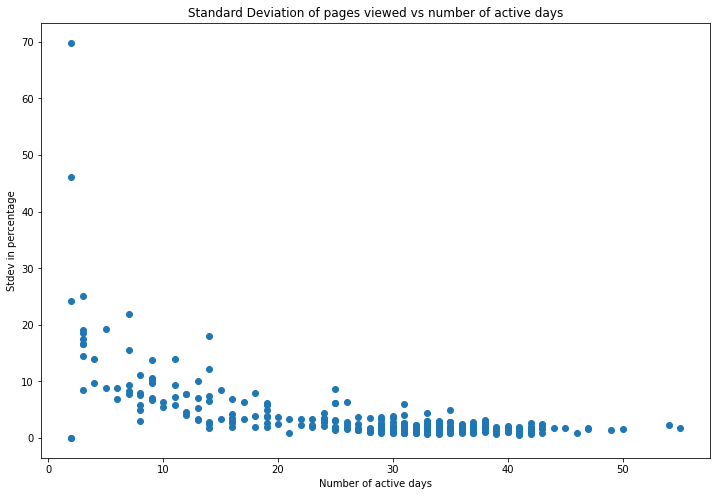

In [133]:
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.scatter(userdf.active_days, userdf.pages_daily_std_pct)
plt.title('Standard Deviation of pages viewed vs number of active days')
plt.ylabel('Stdev in percentage')
plt.xlabel('Number of active days');

I find this chart fairly interesting.  As you can see, the people that use the system a large number of days all have a small standard deviation in the number of pages viewed (they basically view the same number of pages each day).  There are a few outliers in this group around 25 active days which is interesting.

**TODO:** Look at the users with large standard deviations in pages compared to their peers.

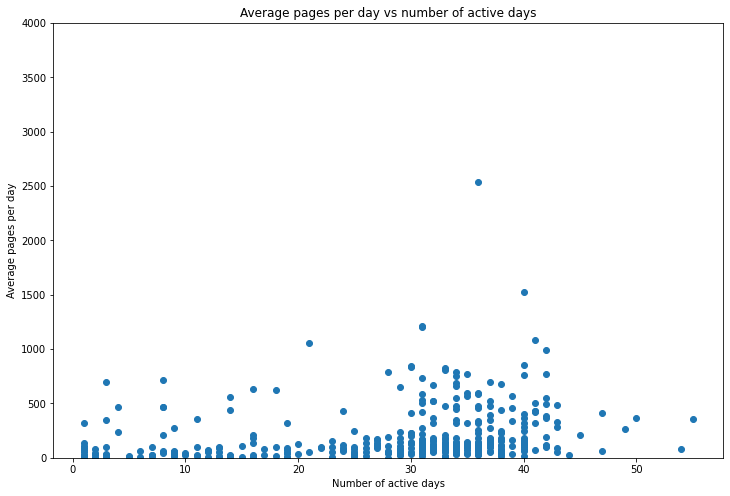

In [140]:
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.scatter(userdf.active_days, userdf.pages_daily_avg)
plt.title('Average pages per day vs number of active days')
plt.ylabel('Average pages per day')
plt.xlabel('Number of active days')
plt.ylim([0,4000]);

There are several outliers in this view also.  I would have expected that the people that use the system the most days would also be the people that view the most pages per day but we find that most users are below 500 pages per day.  Of the users that view a high volume of pages, we do not see a clear association with the number of active days.  This could be because certain jobs require many more page views.

**TODO:** Look to see if the top pages viewed by users with over 750 page views per day are the same pages.